In [71]:
#|default_exp app

In [72]:
!pip install -Uqq fastai

In [73]:
#|export

from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper() 

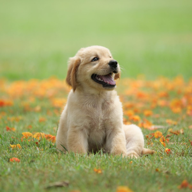

In [74]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

Wrote #|export to know what you would need to include in your python script

In [75]:
#|export
learn = load_learner('model.pkl')

In [76]:
%time learn.predict(im)

CPU times: user 30.4 ms, sys: 23.5 ms, total: 53.8 ms
Wall time: 50.7 ms


('False', tensor(0), tensor([9.9998e-01, 2.1452e-05]))

### Gradio doesn't offer numpy arrays. It returns tensors. It changes it into a normal float

zip(categories, map(float,probs)): The zip() function takes two iterables as its arguments and returns an iterator of pairs where the first element of each passed iterable is paired together, the second element of each passed iterable is paired together, and so on. In this case, the categories tuple and the iterable of floating-point numbers are passed, resulting in an iterable of pairs with a category (e.g., 'Dog' or 'Cat') as the first element and the corresponding probability as the second element.

dict(zip(categories, map(float,probs))): The dict() function takes the iterable of pairs and converts it into a dictionary. The first element of each pair becomes a key in the dictionary, and the second element becomes the corresponding value.



In [77]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [78]:
classify_image(im)

{'Dog': 0.9999785423278809, 'Cat': 2.145169855793938e-05}

In [79]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


In [80]:
m = learn.model

In [81]:
ps = list(m.parameters())

In [82]:
ps[1]

Parameter containing:
tensor([ 2.3466e-01,  2.6510e-01, -5.1096e-08,  5.1749e-01,  3.4404e-09,
         2.2097e-01,  4.2220e-01,  1.3153e-07,  2.4928e-01,  1.5152e-06,
         3.1646e-01,  2.5053e-01,  3.7872e-01,  1.0862e-05,  2.7468e-01,
         2.3753e-01,  2.4204e-01,  3.9516e-01,  4.7046e-01,  2.9192e-01,
         2.7224e-01,  2.7841e-01,  2.9122e-01,  2.0654e-01,  2.6023e-01,
         2.8018e-01,  2.9415e-01,  3.1532e-01,  3.8897e-01,  3.0183e-01,
         2.6597e-01,  2.1040e-01,  2.8733e-01,  3.3120e-01,  4.2706e-01,
         3.7333e-01,  7.4804e-08,  1.8998e-01,  1.4740e-08,  2.2439e-01,
         1.7998e-01,  2.4875e-01,  2.7263e-01,  2.5951e-01,  2.9423e-01,
         3.0042e-01,  2.2399e-01,  2.6372e-01,  2.2001e-08,  2.6561e-01,
         2.2093e-01,  2.8387e-01,  3.3032e-01,  2.2735e-01,  3.6627e-01,
         2.1374e-01,  2.3958e-01,  2.4871e-01,  5.2495e-01,  2.4678e-01,
         2.9540e-01,  2.5761e-01,  4.8339e-01,  2.6571e-01],
       requires_grad=True)

In [83]:
ps[0].shape

torch.Size([64, 3, 7, 7])

In [84]:
ps[0]

Parameter containing:
tensor([[[[-1.0307e-02, -5.9970e-03, -1.6513e-03,  ...,  5.6735e-02,
            1.7225e-02, -1.2566e-02],
          [ 1.1195e-02,  9.6654e-03, -1.0978e-01,  ..., -2.7109e-01,
           -1.2894e-01,  3.8624e-03],
          [-6.8353e-03,  5.9206e-02,  2.9559e-01,  ...,  5.1983e-01,
            2.5642e-01,  6.3645e-02],
          ...,
          [-2.7462e-02,  1.6128e-02,  7.2657e-02,  ..., -3.3277e-01,
           -4.2050e-01, -2.5778e-01],
          [ 3.0660e-02,  4.1013e-02,  6.2887e-02,  ...,  4.1390e-01,
            3.9363e-01,  1.6608e-01],
          [-1.3705e-02, -3.6232e-03, -2.4056e-02,  ..., -1.5063e-01,
           -8.2194e-02, -5.7781e-03]],

         [[-1.1386e-02, -2.6561e-02, -3.4547e-02,  ...,  3.2588e-02,
            7.5460e-04, -2.5655e-02],
          [ 4.5676e-02,  3.3653e-02, -1.0445e-01,  ..., -3.1244e-01,
           -1.6043e-01, -1.2071e-03],
          [-8.4443e-04,  9.8443e-02,  4.0212e-01,  ...,  7.0792e-01,
            3.6889e-01,  1.2456e-01]

### export -

Had to use a different way, instead of this:

`from nbdev.export import notebook2script
notebook2script('app.ipynb')`

In [85]:
import nbdev
nbdev.export.nb_export('app.ipynb', 'app')
print('Export successful')

Export successful
